# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 4: Analizando un cubo de datos**

En clases ya vimos varios tipos de datos que utilizamos para analizar objetos astronómicos, como lo hacen las técnicas de fotometria y espectroscopia. En principio, se puede entender la fotometría como un "subconjunto" de la espectroscopia, pero esta última es mucho más costosa.

Con un único espectro solo podemos analizar cómo se descompone la luz de un único objeto, lo cual puede ser muy útil si estudiamos objetos puntuales. En algunos casos queremos estudiar objetos "extendidos" en el cielo, como las galaxias o explorar los espectros de muchas estrellas de forma simultánea (como en un cúmulo de estrellas). Para este tipo de casos, es ideal obtener un espectro para cada posición del cielo alrededor de algún objeto central. Esto se suele conocer como "Espectroscopia de campo integral" (IFS por sus siglas en inglés).

En esta minitarea exploraremos un cubo de datos, aprenderemos a como entender su formato, extraer información fundamental e identificar algunos objetos extrayendo su espectro.

## A jugar con los datos!

Descargue los datos que vamos a utilizar en el siguiente [link.](https://drive.google.com/file/d/1V7j-WJpTY9fZwajyhpp_Vj9ZZ1rjKN_j/view?usp=sharing)

**CUIDADO:** los datos pesan ~3 Gb, usted debe descargarlos y subirlos a alguna carpeta de Drive (misma carpeta donde tendrá esta tarea!).

In [262]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/CD2201-16/Tarea4/CSWA31_MUSE_vacuum_zap.fits'

Cargue el cubo de datos con astropy en la siguiente celda.

In [264]:
import astropy.io.fits as F
cubo = F.open(path_archivo)

Muestre el *header* de la primera extensión de la variable cubo.

In [265]:
# Muestre el header (es recomendable que no use "print" en esta ocasión)
header = cubo[0].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =           140.357084 / [deg] 09:21:25.7 RA (J2000) pointing           
DEC     =              18.1713 / [deg] 18:10:16.6 DEC (J2000) pointing          
EQUINOX =               2000.0 / Standard FK5                                   
EXPTIME =              13575.0 / Integration time                               
MJD-OBS =       58841.29679796 / Obs start                                      
DATE-OBS= '2019-12-24T07:07:

Examinando la información desplegada responda:

1.   ¿Qué telescopio tomó los datos?
2.   ¿Qué instrumento lo hizo?
3.   ¿Cuál es el nombre del objeto observado?
4.   Reporte el valor de la variable 'EXPTIME' del header. Esto corresponde al *tiempo de integración* que se necesito para obtener los datos. ¿A qué corresponde ese tiempo?

**Respuesta:**


1.   El telescopio utilizado fue el ESO-VLT-U4.
2.   El instrumento utilizado fue un espectrógrafo MUSE.
3.   Se observa el objeto CSWA 31.
4.   El tiempo de integración fue de 13575 segundos, este valor corresponde a la cantidad de tiempo en el cual la luz del objeto fue capturada por el telescopio.








Ahora que ya conoce el telescopio y el instrumento que tomó los datos, investigue y responda las siguientes preguntas:

1. ¿De que tamaño es el diámetro del espejo del telescopio?
2. ¿Cuán grande es el campo de visión que examina el instrumento (Field of view o FOV en inglés)? Compare dicho campo de visión con el tamaño angular de la luna visto desde la tierra (algo así como medio grado) ¿Cuántos campos de visión del intrumento "caben" en la luna?.
3. ¿Qué rango de longitud de onda explora este instrumento?

**Respuesta:**



1.   Según el sitio web de la ESO, el telescopio ESO-VLT-U4 tiene 8,2 metros de diametro en su espejo principal.

2.   El instrumento MUSE tiene dos modos de operación, el Wide Field Mode (WFM) con el cual tiene un campo de visión de 1x1 arcmin., y el Narrow Field Mode (NFM) con el cual tiene un campo de visión de 7,5x7,5 arcsec.

*   Al comparar el FOV WFM de 1x1 arcmin con el tamaño angular de la Luna, el cual se toma como aproximadamente 0.5 grados (30 arcmin), se tiene que cabrían alrededor de 900 campos de visión del modo WFM dentro del tamaño angular de la Luna.


3. El instrumento MUSE explora un rango de longitudes de onda desde aproximadamente 4650 Å hasta 9300 Å.





Explore la extensión asociada a los datos (índice = 1).
Extraiga los datos y describa cada eje del cubo. ¿En que unidades se encuentran los datos?
**Respuesta:** Estos datos se encuentran en la unidad de medida de "pixeles", con la particularidad de que NAXIS3 puede representar diferentes longitudes de onda o frecuencias.

**Hint:** explore las variables 'CTYPE', estas le indicarán a que corresponde cada eje del cubo. Las unidades se encontrarán en la variable 'BUNIT'.

In [266]:
# Muestre el header de la primera extensión (índice = 1) aquí.
header_data = cubo[1].header
header_data

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  322                                                  
NAXIS2  =                  325                                                  
NAXIS3  =                 3682                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =      160.93047228529 / Pixel coordinate of reference point            
CRPIX2  =       162.3187381719 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

In [267]:
# Guarde los datos en la siguiente variable.
datos = cubo[1].data

In [268]:
print(datos.shape)     # noten que la dimensión de mayor número es la espectral, las otras 2 son espaciales :)

(3682, 325, 322)


## White-light image y su visualización

Una white-light image es una imagén en la cual se sumó en la dirección espectral, es decir, sumamos todos los fotones que llegaron en todo el rango explorado, de ahí el origen del nombre.

Cree un código capaz de calcular una white-light image (una línea con numpy), quizá se demore un poco en ejecutar esta parte.

In [269]:
# Aquí el código.
import numpy as np
white_light_image = np.sum(datos, axis=0)

Visualice su imagen con plt.imshow().

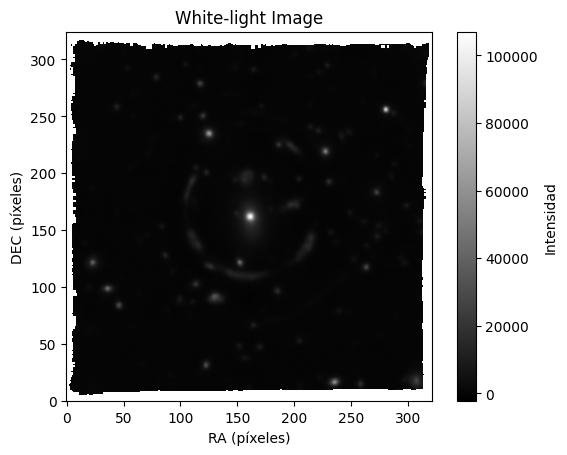

In [270]:
import matplotlib.pyplot as plt

# Visualizamos la white-light image
plt.imshow(white_light_image, origin='lower', cmap='gray')
plt.colorbar(label='Intensidad')
plt.title('White-light Image')
plt.xlabel('RA (píxeles)')
plt.ylabel('DEC (píxeles)')
plt.show()

Notará que en la imagen existen una especie de arcos aproximadamente circulares. Explique brevemente, ¿a qué fenómeno físico corresponde esto?

**Respuesta:**

Este fenomeno corresponde a los lentes gravitacionales, ocurre cuando una gran masa, ya sea una galaxia, curva el espacio-tiempo.

El resultado crudo de dicha visualización puede mejorar de forma significativa.
Para ello usted debe:
1. Cortar la imagen para enforcarnos en las figuras "semi circulares" que se aprecian.
2. Ajustar la scala de la imagen para generar mayor contraste.
3. Cambie el mapa de colores a uno que le parezca adecuado ([aquí una lista](https://matplotlib.org/stable/users/explain/colors/colormaps.html)).
4. Añadir coordenadas a los ejes y una colorbar.


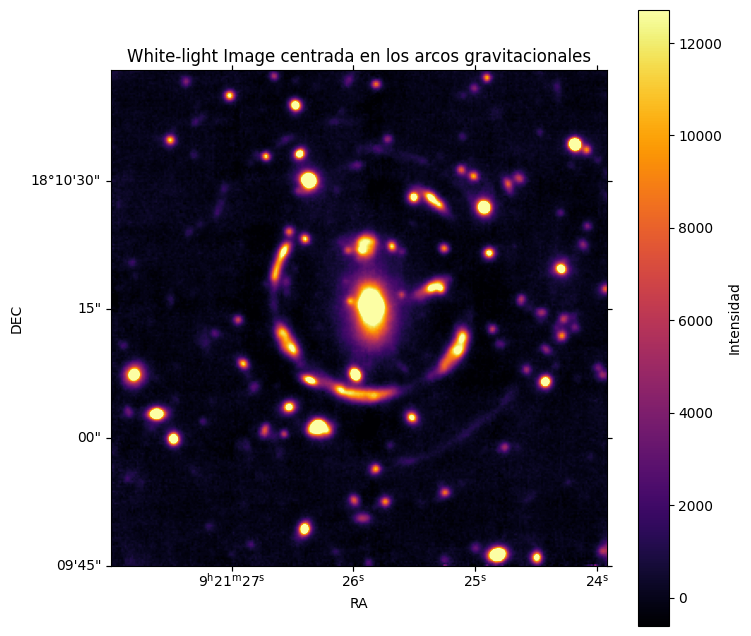

In [271]:
# Solución
from astropy.wcs import WCS
# Utilizamos el siguiente wcs para añadir las coordenadas a su visualización.
wcs = WCS(cubo[1].header)
wcs = wcs[0,:,:]
# Cortamos la imagen para enfocarnos en los arcos
cut_white_light_image = white_light_image[10:300, 10:300]

# Aplicamos un rango de percentiles para cortar valores extremos y mejorar el contraste
vmin, vmax = np.percentile(cut_white_light_image, (1, 99))

# Haga su gráfico a continuación:

# Visualización con WCS y ajustes de color
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcs)
img = ax.imshow(cut_white_light_image, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(img, label='Intensidad')

# Etiquetas y título
ax.set_title('White-light Image centrada en los arcos gravitacionales')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

plt.show()

Para lo que viene utilizaremos una librería creada para lidiar con cubos de datos.
La instalaremos utilizando **pip**, note que esta instalación es solo en el ambiente de google colab, nada se instalará en su computador.  
La documentación la puede encontrar [aquí.](https://mpdaf.readthedocs.io/en/stable/)

In [272]:
!pip install mpdaf

In [273]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import mpdaf as mpdaf

# Aquí tienen una lista de 4 coordenadas extraídas de la Tabla 1 del artículo https://arxiv.org/pdf/2203.13759
# s0(a) =  9:21:25.040, 18:10:12.27    (RA, DEC)
# s0(b) =  9:21:25.858, 18:10:07.24    (RA, DEC)
# s0(c) =  9:21:26.439, 18:10:13.60    (RA, DEC)
# s0(d) =  9:21:25.781, 18:10:24.64    (RA, DEC)

# Cree un objeto SkyCoord para cada una de las coordenadas anteriores.
s0a = SkyCoord('9h21m25.040s', '18d10m12.27s', frame='icrs')
s0b = SkyCoord('9h21m25.858s', '18d10m07.24s', frame='icrs')
s0c = SkyCoord('9h21m26.439s', '18d10m13.60s', frame='icrs')
s0d = SkyCoord('9h21m25.781s', '18d10m24.64s', frame='icrs')

# Esto mostrará las coordenadas en grados de la primera coordenada.
print('s0a = (RA, DEC) = ',s0a.ra.value,',' ,s0a.dec.value)

s0a = (RA, DEC) =  140.3543333333333 , 18.170075


Cargaremos el cubo con mpdaf y luego extraeremos espectros con aperturas circulares.

In [274]:
# Cargamos con mpdaf
cube = mpdaf.obj.Cube(path_archivo)

Busque la documentación de mpdaf.obj.Cube, allí encontrará el método "aperture".
Este método extrae un espectro de una apertura circular en el cubo.

Averigue como utilizar dicha función para extraer un espectro en cada coordenada antes creada
considerando, una apertura de diámetro de 2"
Un pequeño hint: el centro debe ser de la forma (dec, ra) y cada coordenada con su valor en grados.

In [275]:
# Coordenadas en formato (dec, ra) en grados, radio en arcosegundos
centro_s0a = (s0a.dec.deg, s0a.ra.deg)
centro_s0b = (s0b.dec.deg, s0b.ra.deg)
centro_s0c = (s0c.dec.deg, s0c.ra.deg)
centro_s0d = (s0d.dec.deg, s0d.ra.deg)

# Radio en arcosegundos (no incluimos las unidades en el argumento directamente)
radio = 2

# Extracción de espectros
espectro_s0a = cube.aperture(centro_s0a, radio, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0b = cube.aperture(centro_s0b, radio, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0c = cube.aperture(centro_s0c, radio, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0d = cube.aperture(centro_s0d, radio, unit_center=u.deg, unit_radius=u.arcsec)

[INFO] 400 spaxels used
INFO:mpdaf.obj.data:400 spaxels used
[INFO] 400 spaxels used
INFO:mpdaf.obj.data:400 spaxels used
[INFO] 400 spaxels used
INFO:mpdaf.obj.data:400 spaxels used
[INFO] 400 spaxels used
INFO:mpdaf.obj.data:400 spaxels used


Grafique los 4 espectros en un único gráfico. Notará que es bastante difícil descifrar algo de forma directa con plots "crudos". Estos espectros se ven todos bastante parecidos.

Grafique únicamente el rango de longitud de onda entre 9240-9310 Å.
Para esto puede utilizar el método "plot" de los objetos antes creados.

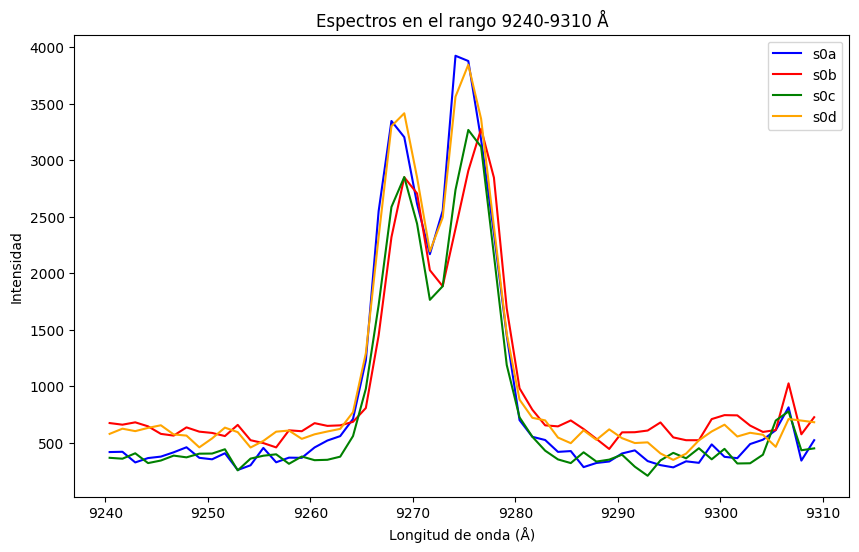

In [276]:
# Definimos el rango de longitudes de onda
lambda_min = 9240
lambda_max = 9310

# Extraemos los datos de longitud de onda e intensidad para cada espectro
wave_s0a = espectro_s0a.wave.coord()
flux_s0a = espectro_s0a.data

wave_s0b = espectro_s0b.wave.coord()
flux_s0b = espectro_s0b.data

wave_s0c = espectro_s0c.wave.coord()
flux_s0c = espectro_s0c.data

wave_s0d = espectro_s0d.wave.coord()
flux_s0d = espectro_s0d.data

# Filtramos el rango deseado
mask_s0a = (wave_s0a >= lambda_min) & (wave_s0a <= lambda_max)
mask_s0b = (wave_s0b >= lambda_min) & (wave_s0b <= lambda_max)
mask_s0c = (wave_s0c >= lambda_min) & (wave_s0c <= lambda_max)
mask_s0d = (wave_s0d >= lambda_min) & (wave_s0d <= lambda_max)

# Graficamos los espectros en el rango definido
plt.figure(figsize=(10, 6))

plt.plot(wave_s0a[mask_s0a], flux_s0a[mask_s0a], label="s0a", color='blue')
plt.plot(wave_s0b[mask_s0b], flux_s0b[mask_s0b], label="s0b", color='red')
plt.plot(wave_s0c[mask_s0c], flux_s0c[mask_s0c], label="s0c", color='green')
plt.plot(wave_s0d[mask_s0d], flux_s0d[mask_s0d], label="s0d", color='orange')

# Añadimos título y etiquetaaaas
plt.title("Espectros en el rango 9240-9310 Å")
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Intensidad")

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()



Notará que hay una emisión bastante clara con 2 máximos, uno detrás de otro.
Esto es lo que se conoce como líneas espectrales de emisión de una galaxia.
En particular, estas líneas parecen ser todas iguales entre los distintos espectros. Los autores del artículo antes mencionado afirman que estas 4 coordenadas provienen de una misma única fuente de fondo, ¿cómo justificarían dicha afirmación con el gráfico que obtuvieron recién?

**Respuesta: (algo corto y simple!)**

El hecho de que las cuatro coordenadas tengan comportamientos casi identicos es porque todas provienen de una misma galaxia, la cual tiene un espectro multiplicado debido a los lentes gravitacionales.

Esta emisión proviene del gas de estas fuentes, en particular es una línea de  OII, es decir, oxígeno que fue ionizado. Esta línea es lo que se conoce como un "doblete" (doublet en inglés), lo que quiere decir que en realidad son dos líneas, muy cercanas en longitud de onda. La longitud de onda medida en laboratorio de ambas líneas es 3727.092 Å y 3729.875 Å, respectivamente. Claramente las líneas que vemos en estas fuentes no están centradas en esas longitudes de onda.

El desplazamiento aparente de las longitudes de onda, con respecto a aquellas medidas en el laboratorio, es un efecto de la expansión del universo. La expansión genera que los fotones pasen a tener una longitud de onda cada vez más larga a medida que se alejan de un observador. Esto se suele definir con la cantidad "redshift" (z) definida por:

$$\lambda_{obs} = (1+z) \lambda_0 $$

donde $\lambda_{obs}$ y $\lambda_0$ corresponde a la longitud de onda observada y aquella medida en el laboratorio. Vamos a determinar el redshift de esta fuente, para ello fitearemos un modelo que considera dos gaussianas (una para cada línea) y una constante, es decir nuestro modelo es de la forma:

$$f(\lambda, z,  A_1, \sigma_1, A_2, \sigma_2, C) = A_1 \exp(-(\lambda - (1+z)\lambda_{0,1})^2 /(2 \sigma_1^2 ))  + A_2 \exp(-(\lambda - (1+z)\lambda_{0,2})^2 /(2 \sigma_2^2 )) + C$$

Donde $\lambda_{0,1} = 3727.092$ Å y $\lambda_{0,2} = 3729.875$ Å.

MPDAF ya es capaz de hacer este fit por nosotros, para ello proceda como se le indica:

1. Note que cada espectro antes producido es un objeto de Python, dichos objetos tienen como método gauss_dfit. Explore la documentación de mpdaf y busque el método gauss_dfit. Describa los 3 primeros parámetros de dicha función.
**Respuesta:**



1.   params_init es un array de valores iniciales para los parámetros del ajuste (amplitudes, posiciones, anchuras, etc.).
2.   bounds son los límites para los parámetros durante el ajuste.
3.   nsig son el número de desviaciones estándar usado para definir el rango del ajuste.





2. Considerando que vamos a hacer nuestro fit en el rango 9240-9310 Å, utilice el método antes descrito.

3. El resultado deberían ser dos objetos de tipo obj.Gauss1D, utilice el método print_param() para mostrar los resultados de cada fit.

In [277]:
# Definimos el rango de longitudes de onda para el ajuste
lambda_min = 3727.092
lambda_max = 3729.875
# Definimos la proporción de las alturas entre las dos líneas del doblete (wratio)
wratio = lambda_min/lambda_max

In [278]:
# Utilizamos el método gauss_dfit (solo utilizaremos un espectro de los antes calculados, no necesitamos los 4)
fit1, fit2 = espectro_s0a.gauss_dfit(9240, 9310, wratio=wratio)

# Haga el print de los parámetros del primer objeto Gauss1D (fit1) (utilice el método "print_param" para esto)
fit1.print_param()

[INFO] Gaussian center = 9275.39 (error:0.0577596)
INFO:mpdaf.obj.fitting:Gaussian center = 9275.39 (error:0.0577596)
[INFO] Gaussian integrated flux = 19079 (error:406.38)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 19079 (error:406.38)
[INFO] Gaussian peak value = 3539.19 (error:7.29445)
INFO:mpdaf.obj.fitting:Gaussian peak value = 3539.19 (error:7.29445)
[INFO] Gaussian fwhm = 5.0643 (error:0.0974312)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 5.0643 (error:0.0974312)
[INFO] Gaussian continuum = 464.069
INFO:mpdaf.obj.fitting:Gaussian continuum = 464.069


In [279]:
# Haga el print de los parámetros del segundo objeto Gauss1D (fit2)
fit2.print_param()

[INFO] Gaussian center = 9268.47 (error:0.0577166)
INFO:mpdaf.obj.fitting:Gaussian center = 9268.47 (error:0.0577166)
[INFO] Gaussian integrated flux = 15420 (error:394.488)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 15420 (error:394.488)
[INFO] Gaussian peak value = 2860.45 (error:18.1466)
INFO:mpdaf.obj.fitting:Gaussian peak value = 2860.45 (error:18.1466)
[INFO] Gaussian fwhm = 5.0643 (error:0.0974312)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 5.0643 (error:0.0974312)
[INFO] Gaussian continuum = 464.069
INFO:mpdaf.obj.fitting:Gaussian continuum = 464.069


Note que los modelos no reportan las variables $\sigma$ antes descritas, sino que para describir el ancho utilizan la variable fwhm lo cual es una abreviación para la palabra Full width at half Maximum (ancho a media altura en español).

Responda:
- ¿Qué es el FWHM?
- Para una distribución normal, escriba una ecuación que relacione el FWHM con la desviación estándar $\sigma$ (no es necesario que la demuestre).  

**Respuesta:**


*   El FWHM se define como la distancia entre los dos puntos en los cuales la función alcanza la mitad de su valor máximo
*   La desviación estandar y el FWHM se pueden relacionar con la ecuación $2\sqrt{2ln(2)}×σ$


Ahora, veremos que tan bien lo hizo este modelo, para ello graficaremos encima del espectro el modelo que se obtuvo.

In [280]:
# Función de ayuda para la siguiente parte :)

def gaussian(x, center, fwhm, peak):
  sigma = fwhm/2.355
  dif = x - center
  return peak * np.exp(-(dif**2)/(2*sigma**2))

Realice un gráfico que contenga el espectro en el cual se realizó el "fit" y el modelo encontrado.
Para ello debe implementar la función $f(\lambda, z,  A_1, \sigma_1, A_2, \sigma_2, C)$. Esto se puede realizar utilizando la función "gaussian" del bloque anterior o puede hacer su propia implementación desde 0.

Solo grafique el rango entre 9240-9310 angstroms. Recuerde incluír alguna leyenda, nombres en los ejes, título, etc.

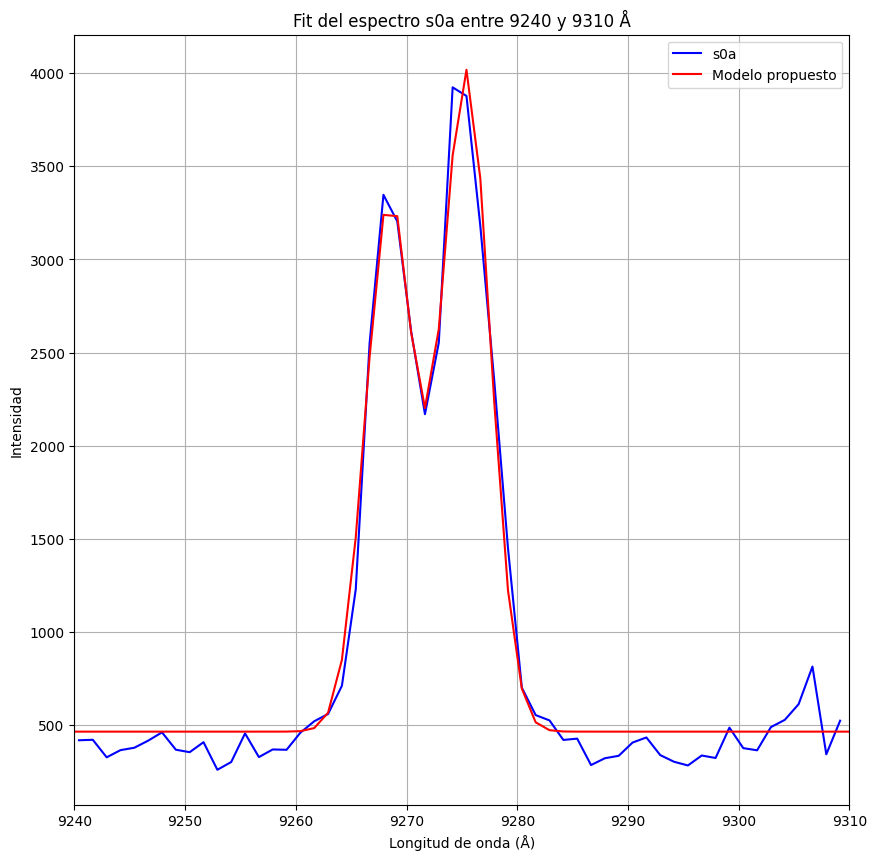

In [281]:
# Definimos variables
center_1 = fit1.lpeak
fwhm_1 = fit1.fwhm
peak_1 = fit1.peak

center_2 = fit2.lpeak
fwhm_2 = fit2.fwhm
peak_2 = fit2.peak

continuum = fit1.cont

# Obtenemos los datos de longitud de onda del espectro
wavelengths = espectro_s0a.wave.coord()

# Creamos el modelo con dos gaussianas y el continuo
modelo = (gaussian(wavelengths, center_1, fwhm_1, peak_1) +
          gaussian(wavelengths, center_2, fwhm_2, peak_2) +
          continuum)

# Graficamos el espectro observado y el modelo
plt.figure(figsize=(10, 10))
plt.plot(wave_s0a[mask_s0a], flux_s0a[mask_s0a], label="s0a", color='blue')
plt.plot(wavelengths, modelo, color='red', label='Modelo propuesto')

# Configuramos el gráfico
plt.title('Fit del espectro s0a entre 9240 y 9310 Å')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Intensidad')
plt.xlim(9240, 9310)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

Podemos notar que el fit para s0a es muy preciso con respecto al modelo propuesto!!

Finalmente, con el resultado del fit, podemos encontrar el redshift de la fuente. Para ello simplemente calcule el redshift (z) utilizando la definición provista, considerando que la longitud de onda observada corresponde con algún centro de las gaussianas.


In [282]:
# Escriba aquí código para el cálculo:

# Longitud de onda observada para la línea de OII
lambda_obs = 9272.71  # Centro de la primera línea ajustada

# Longitud de onda en laboratorio
lambda_0 = 3727.092

# Calculamos el redshift
z = lambda_obs / lambda_0 - 1

print('El redshift es: {:.3f}'.format(z))


El redshift es: 1.488


A modo de curiosidad, el redshift de esta galaxia indica que la luz que observamos se emitió hace poco menos de 10.000 millones de años, 2/3 de la edad del universo :o !!

## Opcional: no todo es Python!

Existe software capaz de proveer de una visualización y análisis rápido de datos como los que utilizamos en esta actividad. Uno de ellos especialmente diseñado para lidiar con cubos de datos es QfitsView.
El software se puede descargar en el siguiente [link](https://www.mpe.mpg.de/~ott/QFitsView/).

Descargue el software y abra directamente los datos descargados en su computador, para ello debe seleccionar la extensión "DATA". Notará que abrirá el cubo y podrá desplazarse a lo largo de todos los canales. Ajuste la escala a "linear" y utilizando el 98% del rango de los datos para un mejor contraste.

Una pequeña guía para repetir todo lo que hicieron en la actividad:
- A medida que mueve su "ratón" por sobre la imagen del canal seleccionado, verá que el "gráfico" de abajo cambia. Dicho gráfico por defecto es el espectro asociado al pixel en el cual su "ratón" está.
- Podemos fijar el espectro que queremos visualizar, para ello haga click derecho en alguna fuente que quiera observar con detalle y seleccione "lock position".
- Para mejorar la señal a ruido de los espectros es recomendable sumar la contribución de varios pixeles al mismo tiempo, para ello, en el gráfico del espectro en su parte superior, seleccione "Circular" en vez de "Single pixel" y aumente el radio (donde dice "R1") a unos 5 pixeles.  
- Si desea analizar en detalle dicho espectro, lo pueden guardar como un archivo fits, para ello solo deben apretar "click derecho" encima de la fuente de interés (sugiero una galaxia muy brillante en el sur-este cerca del arco gravitacional). También pueden guardarlo en otro "buffer" y solo cambiarse de buffer para ver cada espectro.

Pueden aquí ver una serie de [videos tutorial](https://www.youtube.com/playlist?list=PLdVESrjTNUXtwxwysIDLoC4pV20Lbvqaz) si desean aprender más.